### 주어진 매치 데이터에 대한 탐색적 데이터 분석(EDA)

- 주어진 데이터셋은 플레이어들의 게임(매치) 입장 전 상태와 매치 결과를 나타냅니다.
- EDA를 통해 데이터, 특성 간의 관계, 그리고 데이터 분포를 이해하는 것은 모델 구축 및 매칭 전략에 대한 인사이트 도출에 중요합니다.
- 아래에 몇 가지 단계와 코드 조각을 제공하여 자세한 EDA를 수행할 수 있습니다.

#### 1. **필요한 라이브러리 가져오기 및 데이터 로드**:

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv('data/데이터 분석가_과제_Type A/match_data.csv')
test_data = pd.read_csv('data/데이터 분석가_과제_Type A/test_data.csv')

#### 2. **기본 데이터 탐색**:

1. **createdatekst**:
   - 이 컬럼은 데이터가 기록된 시각을 나타냅니다. 예를 들어, '2022-07-07 20:00:51'은 이 데이터 포인트가 2022년 7월 7일 오후 8시 0분 51초에 기록되었음을 나타냅니다.

2. **matchid**:
   - 이 컬럼은 각 게임의 고유 식별자를 나타냅니다. 예를 들어, 'm01e00174ad0241e'는 특정 게임을 나타냅니다.

3. **accountid**:
   - 이 컬럼은 각 유저의 고유 식별자를 나타냅니다. 예를 들어, '123'은 특정 유저를 나타냅니다.

4. **teamid**:
   - 이 컬럼은 팀 번호를 나타냅니다. '1' 또는 '2'의 값이 있으며, 유저가 속한 팀을 나타냅니다.

5. **mmr**:
   - 이 컬럼은 유저의 스킬 점수를 나타냅니다. 예를 들어, '1995'는 유저의 스킬 점수가 1995점임을 나타냅니다. 점수가 높을수록 높은 실력을 가진 유저입니다.

6. **guildid**:
   - 이 컬럼은 유저가 속한 길드의 코드 식별자를 나타냅니다. 유저가 길드에 가입하지 않은 경우 이 컬럼은 비어 있습니다. 예를 들어, 'G318'은 특정 길드를 나타냅니다.

7. **winstreak**:
   - 이 컬럼은 유저의 연승 기록 수를 나타냅니다. 예를 들어, '0'은 유저가 연속으로 이긴 게임이 없음을 나타냅니다.

8. **losestreak**:
   - 이 컬럼은 유저의 연패 기록 수를 나타냅니다. 예를 들어, '4'는 유저가 연속으로 4번 진 게임이 있음을 나타냅니다.

9. **recentwinprob**:
   - 이 컬럼은 유저의 최근 10개 게임의 승률을 나타냅니다. 예를 들어, '0.3'은 최근 10개 게임 중 30%를 이겼음을 나타냅니다.

10. **accumatches**:
    - 이 컬럼은 유저의 누적 게임 수를 나타냅니다. 예를 들어, '95'는 유저가 총 95회의 게임을 플레이했음을 나타냅니다.

11. **tier**:
    - 이 컬럼은 유저의 티어 정보를 나타냅니다. 티어는 언랭크(unranked)부터 마스터(master)까지 다양하며, 높은 티어일수록 높은 실력을 의미합니다.

12. **itemid**:
    - 이 컬럼은 유저가 매치에 입장할 때 착용한 아이템의 식별자를 나타냅니다. 예를 들어, '1401'은 특정 아이템을 나타냅니다.

13. **matchresult**:
    - 이 컬럼은 게임의 결과를 나타냅니다. '1'은 승리, '0'은 패배를 의미합니다.

14. **matchscore**:
    - 이 컬럼은 게임에서의 점수를 나타냅니다. 점수는 0부터 100 사이의 범위를 가집니다. 예를 들어, '58'은 게임에서 58점을 받았음을 나타냅니다.

15. **isDrop**:
    - 이 컬럼은 유저가 게임을 포기하고 관전했는지 여부를 나타냅니다. '1'은 게임을 포기하고 관전했음을, '0'은 게임을 포기하지 않았음을 나타냅니다.

16. **isEscape**:
    - 이 컬럼은 유저가 게임에서 탈주했는지 여부를 나타냅니다. '1'은 게임에서 탈주했음을, '0'은 탈주하지 않았음을 나타냅니다.

In [12]:
# 데이터 느낌 얻기
train_data.head()

,createdatekst,matchid,accountid,teamid,mmr,guildid,winstreak,losestreak,recentwinprob,accumatches,tier,itemid,matchresult,matchscore,isDrop,isEscape
0,2022-07-04 00:27:58,m00160017353d8e81,2097311063,1,1812,G69102,1,0,0.428571,7,gold,1364,0,25,1,0
1,2022-07-04 00:27:58,m00160017353d8e81,1560653129,1,1868,NaN,1,0,0.333333,9,gold,1178,0,35,0,0
2,2022-07-04 00:27:58,m00160017353d8e81,872694401,1,1809,G5900,0,2,0.200000,162,platinum,1385,0,39,0,0
3,2022-07-04 00:27:58,m00160017353d8e81,84538717,1,1631,G424,2,0,0.300000,11,bronze,1338,0,0,1,0
4,2022-07-04 00:27:58,m00160017353d8e81,142829,2,1973,NaN,0,3,0.500000,412,platinum,1277,1,41,0,0


In [15]:
test_data.head()

,createdatekst,matchid,accountid,teamid,mmr,guildid,winstreak,losestreak,recentwinprob,accumatches,tier,itemid
0,2022-07-11 06:25:33,040400175a90b8b2,16953108,1,1952,NaN,0,1,0.4,157,diamond,1277
1,2022-07-11 06:25:33,040400175a90b8b2,453207721,1,1976,G158588,3,0,0.4,307,diamond,1415
2,2022-07-11 06:25:33,040400175a90b8b2,1090662507,1,1952,NaN,0,1,0.5,34,diamond,1178
3,2022-07-11 06:25:33,040400175a90b8b2,688544966,1,1809,NaN,0,1,0.5,65,gold,1170
4,2022-07-11 06:25:33,040400175a90b8b2,268645401,2,1988,G150504,0,1,0.5,8,diamond,1401


In [13]:
# 결측값 확인
train_data.isnull().sum()

createdatekst         0
matchid               0
accountid             0
teamid                0
mmr                   0
guildid          232957
winstreak             0
losestreak            0
recentwinprob         0
accumatches           0
tier                  0
itemid                0
matchresult           0
matchscore            0
isDrop                0
isEscape              0
dtype: int64

In [14]:
# 요약 통계
train_data.describe()

,accountid,teamid,mmr,winstreak,losestreak,recentwinprob,accumatches,itemid,matchresult,matchscore,isDrop,isEscape
count,4.103840e+05,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000,410384.000000
mean,1.057482e+09,1.500000,2017.942880,1.009745,1.003704,0.494668,392.355920,1367.779124,0.500000,55.028186,0.211521,0.013785
std,6.157916e+08,0.500001,246.652163,1.446266,1.464491,0.179296,568.547598,67.623264,0.500001,25.717702,0.408388,0.116596
min,1.351900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5.207713e+08,1.000000,1922.000000,0.000000,0.000000,0.400000,44.000000,1360.000000,0.000000,41.000000,0.000000,0.000000
50%,1.040999e+09,1.500000,2013.000000,0.000000,0.000000,0.500000,163.000000,1387.000000,0.500000,61.000000,0.000000,0.000000
75%,1.577797e+09,2.000000,2133.000000,2.000000,1.000000,0.600000,508.000000,1401.000000,1.000000,76.000000,0.000000,0.000000
max,2.131598e+09,2.000000,3173.000000,29.000000,29.000000,1.000000,4126.000000,1416.000000,1.000000,100.000000,1.000000,1.000000


#### 3. **특성 분포**:

#### 수치 특성에 대한 히스토그램

1. **accountid**:
   - 대부분의 유저들이 특정 accountid 범위에 집중되어 있습니다.
   
2. **winstreak**:
   - 대다수의 유저들이 연승 기록이 0 ~ 5사이에 위치해 있으며, 5 이상의 연승은 상대적으로 적은 유저만이 기록하고 있습니다.

3. **losestreak**:
   - 대다수의 유저들이 연패 기록이 0 ~ 5사이에 있습니다.
   
4. **accumatches**:
   - 누적 게임 수는 대부분 0~1000 사이에 위치하고 있으나, 1000 이상의 누적 게임을 한 유저도 일부 존재합니다.
   
5. **teamid**:
   - 두 팀(1과 2)에 대한 데이터가 거의 균등하게 분포되어 있습니다.
   
6. **itemid**:
   - 대부분의 유저들이 0~250 사이의 itemid를 사용하고 있으며, 1000 이상의 itemid는 상대적으로 적게 사용되고 있습니다.
   
7. **matchscore**:
   - 게임 점수는 0~100 사이에서 다양하게 분포되어 있습니다. 중간값(50) 근처에서 높은 빈도를 보입니다.
   
8. **isDrop**:
   - 대다수의 유저들이 게임을 기권하지 않았습니다 (0). 기권한 유저들(1)은 상대적으로 적습니다.
   
9. **isEscape**:
   - 대부분의 유저들이 게임에서 탈주하지 않았습니다 (0). 탈주한 유저들(1)은 상대적으로 적습니다.
   
10. **mmr**:
    - 스킬 점수는 주로 0~2500 사이에 분포하며, 중간 범위(1000~2000)에서 높은 빈도를 보입니다.

11. **recentwinprob**:
    - 최근 승률은 0.0에서 1.0 사이에 분포하며, 전체적으로 다양한 값들로 분포되어 있습니다.

12. **matchresult**:
    - 게임 결과는 승리(1)와 패배(0) 두 가지로 나타나며, 두 결과 모두 비슷한 빈도로 나타납니다.

##### 매치 결과별 수치 특성에 대한 박스 플롯

##### mmr box plot
"matchresult"의 두 카테고리 (0은 패배, 1은 승리)에 대한 "mmr" 분포를 시각화한 box-plot

- 승리와 패배 그룹 모두 mmr 점수 범위가 넓습니다.
- 두 카테고리 모두 중간 mmr 값이 약 2000 주변인 것으로 보이며, 이는 파란 상자 안의 선으로 표시됩니다.
- 상자 그림의 "whiskers" 밖의 개별 점으로 표시된 두 카테고리 모두에서 mmr 분포의 상위와 하위에 일부 극단 값 (또는 이상치)이 있습니다.

이 그림은 승리와 패배 선수 사이에 mmr에서 명확한 차이가 없음을 나타냅니다. 두 그룹 모두 비슷한 중간 mmr 값과 범위를 가지고 있습니다. 이는 mmr 외에도 경기 결과를 결정하는 데 중요한 역할을 하는 다른 요소들이 있음을 의미할 수 있습니다.

##### recentwinprob(최근 승리 확률) box plot
이 박스플롯은 플레이어들의 `matchresult` (0은 패배, 1은 승리)에 따른 `recentwinprob` (최근 승리 확률)을 비교합니다. 박스플롯에서의 몇 가지 관찰 사항은 다음과 같습니다:

1. **중앙 승리 확률**: 승리 그룹과 패배 그룹 모두 중앙값이 대략 0.4에서 0.5 사이에 있습니다. 이는 플레이어들의 최근 승리 확률이 최근 경기의 승패와 관계없이 이 범위 주변에 위치하고 있음을 나타냅니다.

2. **범위**: 두 박스플롯 모두 비슷한 사분위 범위를 가지고 있어, 승리 그룹과 패배 그룹 모두의 중간 50% 데이터가 최근 승리 확률 측면에서 비슷한 분포를 보입니다.

3. **이상치**: 두 카테고리 모두에 이상치가 있습니다. 최근 경기에서 승리한 몇몇 플레이어들은 낮은 최근 승리 확률을 가지고 있고, 반대의 경우도 있습니다.

4. **전체 분포**: 최근 승리 확률의 분포는 승리한 플레이어와 패배한 플레이어 간에 크게 다르지 않습니다. 이는 플레이어의 최근 승률이 그들의 다음 경기의 결과를 강력하게 예측하지 않을 수 있음을 나타냅니다.

데이터 칼럼에 대해서:
- `recentwinprob`은 플레이어의 최근 10 게임의 승률을 나타냅니다. 높은 값은 최근 더 좋은 성과를 나타냅니다.
- `matchresult`는 플레이어가 최근 게임에서 승리(1)했는지 패배(0)했는지를 나타냅니다.

##### accumatches(누적 경기 수) box plot

사용자가 플레이한 누적 경기 수(`accumatches`)의 분포를 `matchresult` (0은 패배, 1은 승리)에 기반한 두 그룹에 대해 보여줍니다. 박스플롯에서 몇 가지 관찰 사항은 다음과 같습니다:

1. **중앙 누적 경기 수**: 승리 그룹과 패배 그룹의 중앙값은 서로 매우 가깝고 y축의 하단 범위에 위치하고 있습니다. 이는 최근 경기 결과와 관계없이 대부분의 플레이어들이 비슷한 수의 전체 경기를 플레이했다는 것을 나타냅니다.

2. **범위**: 두 박스플롯 모두 비슷한 사분위 범위를 보여주며, 이는 두 그룹 모두의 중간 50% 데이터가 총 게임 플레이 횟수 측면에서 유사한 범위를 가지고 있다는 것을 나타냅니다.

3. **이상치**: 두 카테고리 모두 상단에 상당한 수의 이상치가 있습니다. 이러한 이상치들은 대다수에 비해 훨씬 많은 수의 경기를 플레이한 플레이어들을 나타냅니다.

4. **전체 분포**: 승리한 플레이어와 패배한 플레이어 모두의 누적 경기 수의 전체 분포는 매우 유사해 보입니다. 박스플롯의 넓은 범위는 데이터셋에 새로운 플레이어와 베테랑 플레이어 모두가 섞여 있다는 것을 나타냅니다.

요약하면, 최근 경기에서 승리한 플레이어와 패배한 플레이어 사이에서 전체 경기 수(`accumatches`)는 크게 다르지 않은 것 같습니다. 이상치의 존재는 두 그룹 모두에 매우 경험 많은 플레이어들이 있다는 것을 나타냅니다.

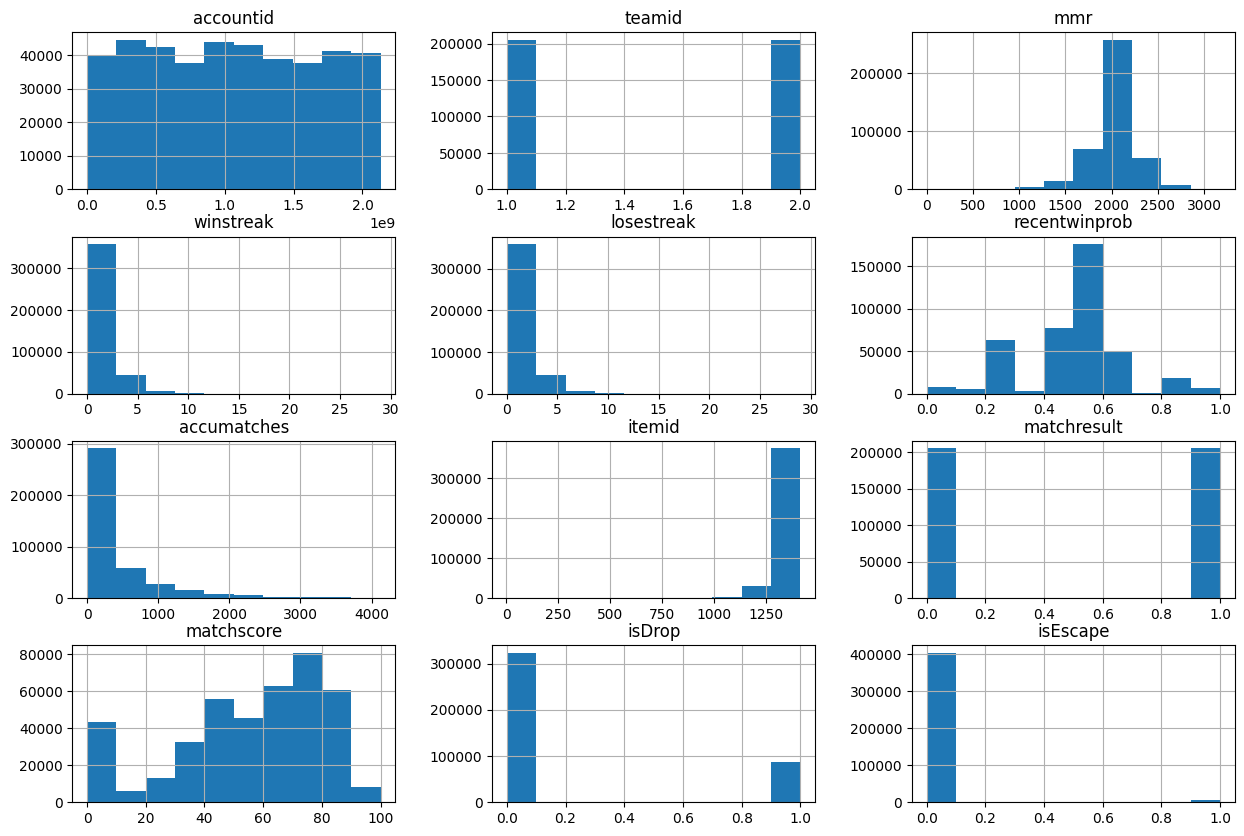

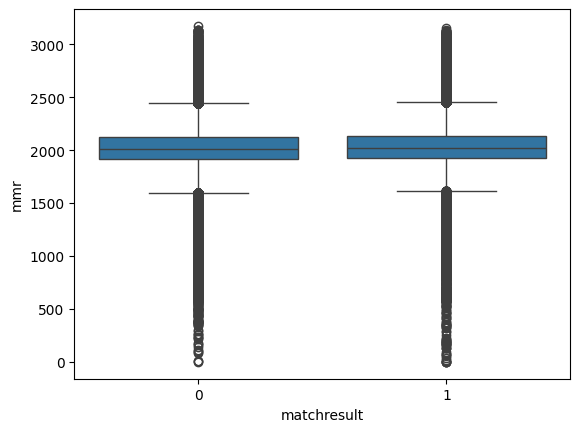

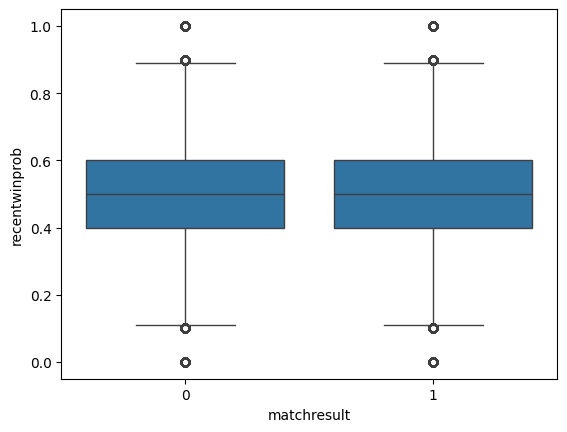

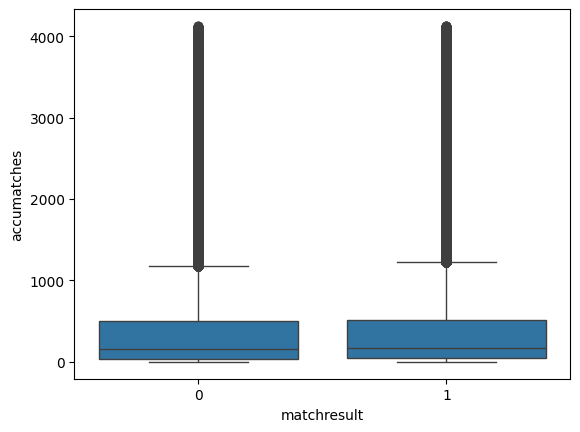

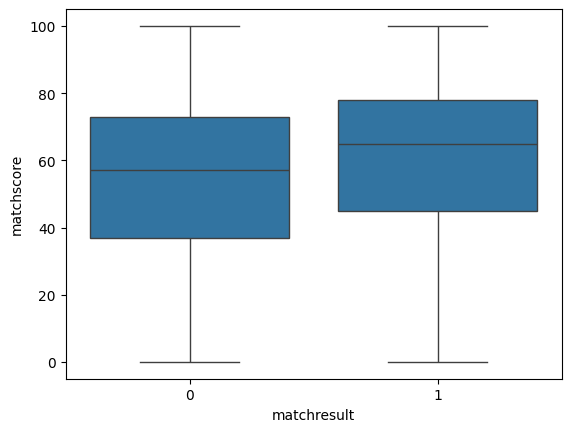

In [16]:
# 수치 특성에 대한 히스토그램
train_data.hist(figsize=(15,10))
plt.show()

# 매치 결과별 수치 특성에 대한 박스 플롯
for column in ['mmr', 'recentwinprob', 'accumatches', 'matchscore']:
    sns.boxplot(x='matchresult', y=column, data=train_data)
    plt.show()

#### 4. **상관 관계 분석**:

1. **accountid**:
   - 대부분의 변수와의 상관관계가 0에 가깝기 때문에 특별한 패턴이나 관계를 찾기 어렵습니다.

2. **teamid**:
   - 모든 변수와의 상관관계가 매우 낮습니다.

3. **mmr (Matchmaking Rating)**:
   - `winstreak`: 0.16
   - `losestreak`: 0.19
   - `recentwinprob`: 0.32
   - `matchscore`: 0.47
   - `isDrop`: -0.43

4. **winstreak (연속 승리 횟수)**:
   - `losestreak`: -0.48
   - `recentwinprob`: 0.45

5. **losestreak**:
   - 음의 상관관계인 `winstreak`: -0.48

6. **recentwinprob**:
   - `mmr`: 0.32
   - `winstreak`: 0.45

7. **accumatches**:
   - 상관관계가 두드러지는 항목이 없습니다.

8. **itemid**:
   - 상관관계가 두드러지는 항목이 없습니다.

9. **matchresult**:
   - 상관관계가 두드러지는 항목이 없습니다.

10. **matchscore**:
   - `mmr`: 0.47
   - `isDrop`: -0.75

11. **isDrop**:
   - `matchscore`: -0.75
   - `isEscape`: 0.23

12. **isEscape**:
   - `isDrop`: 0.23


테스트 데이터 셋을 살펴보면, 중요한 변수로는 `mmr`, `winstreak`, `losestreak`, `recentwinprob`, `accumatches`, `tier` 및 `itemid`가 있습니다. 이들 변수 중에서 상관관계를 고려하여 특별한 인사이트를 찾아볼 수 있습니다.

그 중에서, `mmr`과 `recentwinprob`의 상관관계가 0.32로 어느 정도 높은 편입니다. 이는 최근의 승률이 높을수록 MMR이 높을 가능성이 있다는 것을 나타냅니다. 그러나 상관관계가 1에 가깝지 않기 때문에 다른 변수들과의 조합으로 예측 모델을 구축하는 것이 좋습니다.

이와 관련하여 `mmr`와 `winstreak`의 상관관계가 0.16, `mmr`와 `losestreak`의 상관관계가 0.19로, 연속 승리나 연속 패배 횟수도 MMR에 약간의 영향을 줄 수 있음을 보여줍니다.

결론적으로, 주어진 테스트 데이터 셋에서는 `mmr`, `recentwinprob`, `winstreak`, 그리고 `losestreak` 사이의 상관관계를 주의 깊게 살펴보는 것이 좋을 것 같습니다.

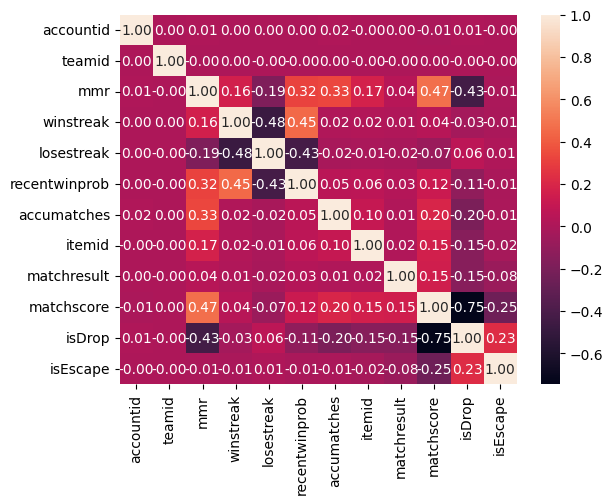

In [20]:
# 문자열 데이터를 포함하는 열을 제거
numeric_data = train_data.select_dtypes(include=[np.number])

# 상관 행렬 계산
corr_matrix = numeric_data.corr()

# 히트맵 표시
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [21]:
# # 'createdatekst' 열을 pandas datetime 객체로 변환
# train_data['createdatekst'] = pd.to_datetime(train_data['createdatekst'])

# # Unix timestamp로 변환
# train_data['createdatekst'] = train_data['createdatekst'].astype(int) / 10**9

# # 상관 행렬 계산
# corr_matrix = train_data.corr()

# # 히트맵 표시
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# plt.show()

#### 5. **범주형 특성 분석**:

첫 번째 그래프는 각 티어별로 경기 결과 (`matchresult`)에 따른 플레이어 수를 나타냅니다.
- 티어는 `unranked`, `bronze`, `silver`, `gold`, `platinum`, `diamond`, `master` 순서로 나타나 있습니다.
- 파란색 막대는 `matchresult`가 0인 경우, 즉 패배한 플레이어의 수를, 주황색 막대는 `matchresult`가 1인 경우, 즉 승리한 플레이어의 수를 나타냅니다.

**분석 결과**:
- `diamond` 티어에서 가장 많은 플레이어가 경기를 진행했으며, 승리한 플레이어와 패배한 플레이어의 수가 거의 비슷합니다.
- `gold`와 `platinum` 티어도 상당히 많은 플레이어가 경기를 진행했으나, `gold` 티어는 패배한 플레이어가 조금 더 많고, `platinum` 티어는 승리한 플레이어가 더 많습니다.
- `master` 티어에서는 상대적으로 경기 횟수가 적지만, 승리한 플레이어의 수가 패배한 플레이어보다 많습니다.
- `unranked`, `bronze`, `silver` 티어에서는 경기 횟수가 적으며, 승리와 패배의 비율이 크게 차이나지 않습니다.

두 번째 그래프는 가장 자주 사용된 20개의 아이템 (`itemid`)에 대한 플레이어 수를 나타냅니다.
- 아이템 `1401`이 가장 많이 사용되었으며, 이어서 `1398`, `1387` 순으로 사용 횟수가 높습니다.
- 리스트의 아래쪽으로 갈수록 아이템의 사용 횟수가 줄어들며, `1307`이 20번째로 많이 사용된 아이템입니다.

이러한 데이터 분석을 통해 각 티어별로 어떤 아이템이 주로 사용되는지, 어떤 티어에서 승리와 패배의 비율이 어떻게 나타나는지 등의 인사이트를 얻을 수 있습니다.

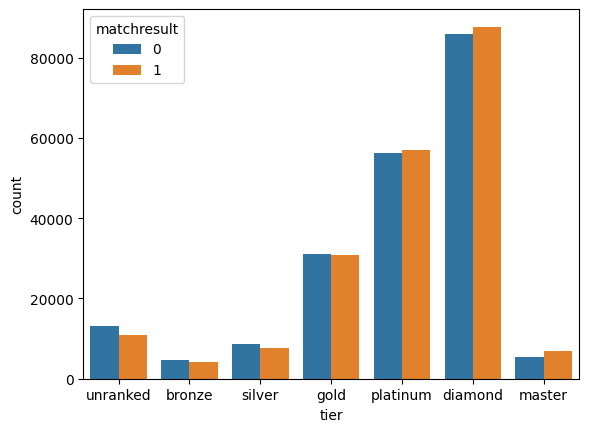

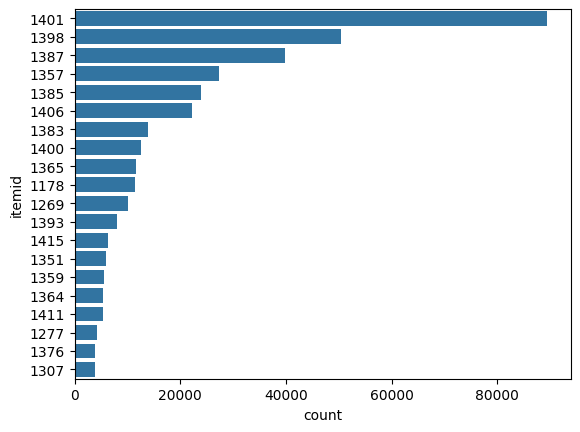

In [22]:
# 티어 분포
sns.countplot(data=train_data, x='tier', hue='matchresult', order=['unranked', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'master'])
plt.show()

# ItemID 분포 (가장 일반적인 20개 아이템)
sns.countplot(data=train_data, y='itemid', order=train_data['itemid'].value_counts().index[:20])
plt.show()

#### 6. **파생 특성 분석**:

In [23]:
# # 티어를 숫자 값으로 변환
# tier_mapping = {'unranked': 0, 'bronze': 1, 'silver': 2, 'gold': 3, 'platinum': 4, 'diamond': 5, 'master': 6}
# train_data['tier_numeric'] = train_data['tier'].map(tier_mapping)
# test_data['tier_numeric'] = test_data['tier'].map(tier_mapping)

# # 팀 평균 mmr 및 티어 계산
# team_avg_mmr = train_data.groupby(['matchid', 'teamid'])['mmr'].mean().unstack()
# team_avg_tier = train_data.groupby(['matchid', 'teamid'])['tier_numeric'].mean().unstack()

# # 팀 간의 스킬 차이
# team_avg_mmr['mmr_diff'] = abs(team_avg_mmr[1] - team_avg_mmr[2])
# team_avg_tier['tier_diff'] = abs(team_avg_tier[1] - team_avg_tier[2])

# # 원래 데이터로 다시 병합
# train_data = pd.merge(train_data, team_avg_mmr['mmr_diff'], on='matchid', how='left')
# train_data = pd.merge(train_data, team_avg_tier['tier_diff'], on='matchid', how='left')

#### 7. **시간에 따른 플레이어 성능**:

이 그래프는 시간에 따른 플레이어의 평균 MMR (Matchmaking Rating) 성능을 나타냅니다.

- x축 (`createdatekst`)은 2022년 6월부터 7월까지의 기간을 나타냅니다.
- y축은 MMR 값으로, 2000부터 2040까지의 범위를 가집니다.

분석 결과:
- 2022년 6월에는 MMR 값이 약 2000부근에서 시작되었습니다.
- 시간이 지남에 따라 플레이어의 평균 MMR 값이 지속적으로 상승하였고, 2022년 7월에는 약 2040까지 올라갔습니다.

이러한 데이터 분석을 통해 주어진 기간 동안 플레이어의 성능이 꾸준히 향상되었음을 알 수 있습니다. 이는 게임 내에서 플레이어들의 경험이나 스킬이 향상되었거나, 다양한 요인들로 인해 평균 MMR 값이 상승했을 수 있습니다.

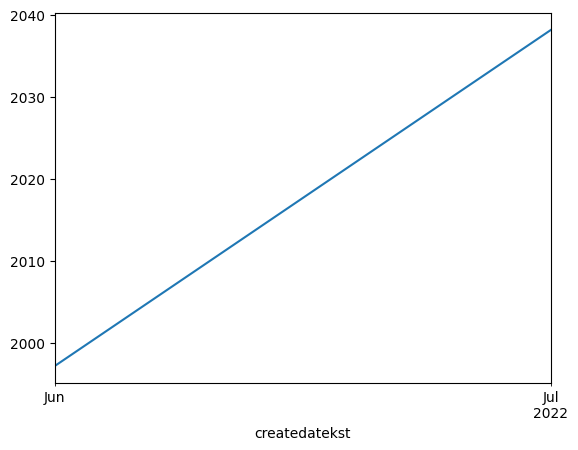

In [24]:
train_data['createdatekst'] = pd.to_datetime(train_data['createdatekst'])
train_data.set_index('createdatekst', inplace=True)
train_data['mmr'].resample('M').mean().plot()
plt.show()